### 신경망 모델

- 이진 분류 : 유방암 예측 사례

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 1. 데이터를 정규/표준화 하지 않은 경우

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, stratify=cancer.target,
    random_state=2022
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense        # Fully connectes network

In [ ]:
model = Sequential([
    Dense(100, input_shape=(30,), activation='relu'),        # 은닉층  노드 갯수, 레이어
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')

    # 100개 -> 24개 -> 1개로 연결되는 모양
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 가중치 30 * 100개 + bias 100개 해서 3100개
# 가중치 100 * 24 + bias 24 2424개
# 가중치 24 * 1 + bias 1 25개

- 모델 설정(컴파일)

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- 모델학습

In [42]:
history = model.fit(X_train, y_train, validation_split=0.2, 
          epochs= 100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 1s 95ms/step - loss: 3.0993 - accuracy: 0.6291 - val_loss: 2.8812 - val_accuracy: 0.7143
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 1.4062 - accuracy: 0.8077 - val_loss: 1.7960 - val_accuracy: 0.5824
Epoch 3/100
4/4 [==============================] - 0s 29ms/step - loss: 0.8573 - accuracy: 0.7692 - val_loss: 0.4936 - val_accuracy: 0.9121
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 0.8537 - accuracy: 0.8654 - val_loss: 0.3778 - val_accuracy: 0.9231
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 0.3710 - accuracy: 0.8901 - val_loss: 0.9051 - val_accuracy: 0.7912
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.4443 - accuracy: 0.8681 - val_loss: 0.3517 - val_accuracy: 0.9231
Epoch 7/100
4/4 [==============================] - 0s 19ms/step - loss: 0.4267 - accuracy: 0.9093 - val_loss: 0.3037 - val_accuracy: 0.9121
Epoch 8/100
4/4 [===

In [ ]:
history

- 모델평가

In [43]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2795 - accuracy: 0.9211


[0.27954593300819397, 0.9210526347160339]

- 훈련과정 시각화 : epoch에 따른 accuracy / val_loss의 변화

In [44]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

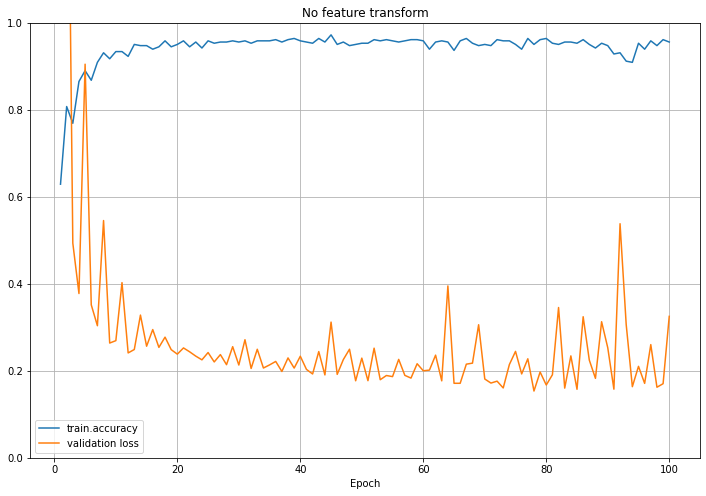

In [45]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train.accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

### 2. 데이터를 정규 / 표준화한 경우

In [ ]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, test_size=0.2, stratify=cancer.target,
    random_state=2022
)

- 모델정의

In [46]:
model2 = Sequential()
model2.add(Dense(100, input_dim=30, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               3100      
                                                                 
 dense_10 (Dense)            (None, 24)                2424      
                                                                 
 dense_11 (Dense)            (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


In [47]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [48]:
hist2 = model2.fit(X_train2, y_train2, validation_split=0.2,
           epochs=100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 1s 56ms/step - loss: 0.6255 - accuracy: 0.5989 - val_loss: 0.5162 - val_accuracy: 0.8791
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 0.4611 - accuracy: 0.8846 - val_loss: 0.4025 - val_accuracy: 0.9121
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.3528 - accuracy: 0.9368 - val_loss: 0.3197 - val_accuracy: 0.9121
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2757 - accuracy: 0.9560 - val_loss: 0.2595 - val_accuracy: 0.9121
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.2212 - accuracy: 0.9588 - val_loss: 0.2166 - val_accuracy: 0.9341
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1838 - accuracy: 0.9588 - val_loss: 0.1869 - val_accuracy: 0.9341
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1579 - accuracy: 0.9615 - val_loss: 0.1671 - val_accuracy: 0.9341
Epoch 8/100
4/4 [===

In [49]:
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 3ms/step - loss: 0.0957 - accuracy: 0.9825


[0.09572675824165344, 0.9824561476707458]

- 학습과정 시각화

In [50]:
y_acc = hist2.history['accuracy']
y_vloss = hist2.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

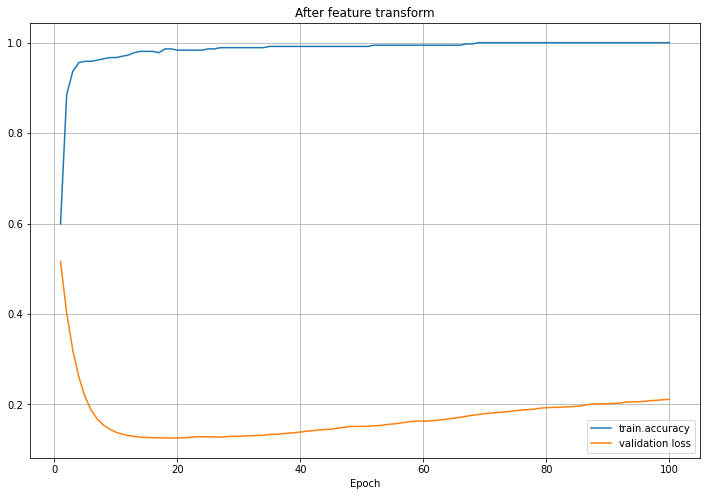

In [51]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train.accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
# plt.ylim([0,1])
plt.xlabel('Epoch')
plt.title('After feature transform')
plt.show()